# Summary
In this Machine learning project our goal is to showcase the use of different data analyzing tools in order to create areained model
to recognize #TODO Keep writing

# Introduction
## Import Libraries

In [51]:
import pandas as pd
import numpy as np
from IPython.core.display import display

import country_converter as coco

# import plotly.graph_objects as go
# import cufflinks
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure
import seaborn as sns
from project_supp import convert_column_to_num_month, month_num_season
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Import Data

In [52]:
df = pd.read_csv("Data/feature_data.csv")

## First look
Currently displayed are the first 10 rows of the data

In [53]:
df.head(10)

,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN
5,67872,50.0,2017,May,week_19,8,2,2.0,0,AGO,...,5,5.0,0.0,0.0,0,0.0,0.297551,7.234509,True,NaN
6,21763,NaN,2016,March,week_11,9,1,0.0,0,PRT,...,0,0.0,0.0,0.0,0,1.0,0.514393,2.490639,True,NaN
7,16156,72.0,2015,NaN,week_33,9,2,0.0,0,NaN,...,0,0.0,0.0,0.0,2,1.0,0.372214,8.449535,True,NaN
8,100645,180.0,2016,October,week_44,28,2,0.0,0,NaN,...,0,0.0,0.0,0.0,2,0.0,0.427402,13.497397,True,NaN
9,95004,280.0,2016,August,week_33,12,2,2.0,0,GBR,...,1,NaN,0.0,1.0,2,0.0,0.182388,16.723083,False,0.0


##Dataframe Info
As seen below this data has 33 features currently of different types.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89542 entries, 0 to 89541
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           89542 non-null  int64  
 1   time_until_order     76861 non-null  float64
 2   order_year           89542 non-null  int64  
 3   order_month          86108 non-null  object 
 4   order_week           89542 non-null  object 
 5   order_day_of_month   89542 non-null  int64  
 6   adults               89542 non-null  int64  
 7   children             89538 non-null  float64
 8   babies               89542 non-null  int64  
 9   country              85201 non-null  object 
 10  order_type           89542 non-null  object 
 11  acquisition_channel  89542 non-null  object 
 12  prev_canceled        89542 non-null  int64  
 13  prev_not_canceled    89542 non-null  int64  
 14  changes              86065 non-null  float64
 15  deposit_type         80536 non-null 

In [55]:
df.describe()

,Unnamed: 0,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,...,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_13
count,89542.000000,76861.000000,89542.000000,89542.000000,89542.000000,89538.000000,89542.000000,89542.000000,89542.000000,86065.000000,...,89542.000000,89542.000000,85510.000000,85309.000000,85294.000000,89542.000000,85811.000000,86810.000000,84585.000000,5776.000000
mean,59716.762871,103.673879,2016.157658,15.828807,1.857497,0.103732,0.007896,0.087411,0.137701,0.223877,...,0.032231,0.989971,1.330944,2.339401,0.062607,0.571922,0.335691,0.427146,8.845679,0.365132
std,34495.242240,106.940156,0.707461,8.779753,0.565296,0.397797,0.095194,0.849799,1.496269,0.663361,...,0.176613,1.698086,1.879927,17.516854,0.243415,0.793567,0.472234,0.128140,5.236673,0.481509
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.038632,0.000000
25%,29838.250000,18.000000,2016.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328012,4.452191,0.000000
50%,59743.500000,69.000000,2016.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425622,8.422255,0.000000
75%,89610.500000,159.000000,2017.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.511077,12.712815,1.000000
max,119388.000000,737.000000,2017.000000,31.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,...,1.000000,9.000000,11.000000,391.000000,3.000000,5.000000,1.000000,0.907525,27.172399,1.000000


# Part 1: Exploration, Basic Hypothesis
## Feature Engineering and Tidying the Data
### Changing Features to Numeric Value

In [56]:
# Function to convert into strings values inside the DF

def str_to_coded(df, feature):
    dic = df[feature].drop_duplicates().dropna().reset_index(drop=True).to_dict()
    dic2 = {val : key for key, val in dic.items()}
    df = df.replace({feature: dic2})
    return df, dic

# Weeks and months

df["order_month"] = convert_column_to_num_month(df, "order_month")
df['order_week'] = df['order_week'].str.strip("week_").astype(int)

# Bol to int

df['anon_feat_12'] = df['anon_feat_12'].astype(int)

# Country name to to country code

df, country_codes = str_to_coded(df, 'country')

# Order type to code

df, order_type_codes = str_to_coded(df, 'order_type')

# Acquisition channel to code

df, acquisition_channel_codes = str_to_coded(df, 'acquisition_channel')

# Customer type to code

df, customer_type_code = str_to_coded(df, 'customer_type')

# Deposit type to code

df, deposit_type_code = str_to_coded(df, 'deposit_type')

## Correlation and First Impression
### Histograms for all Features

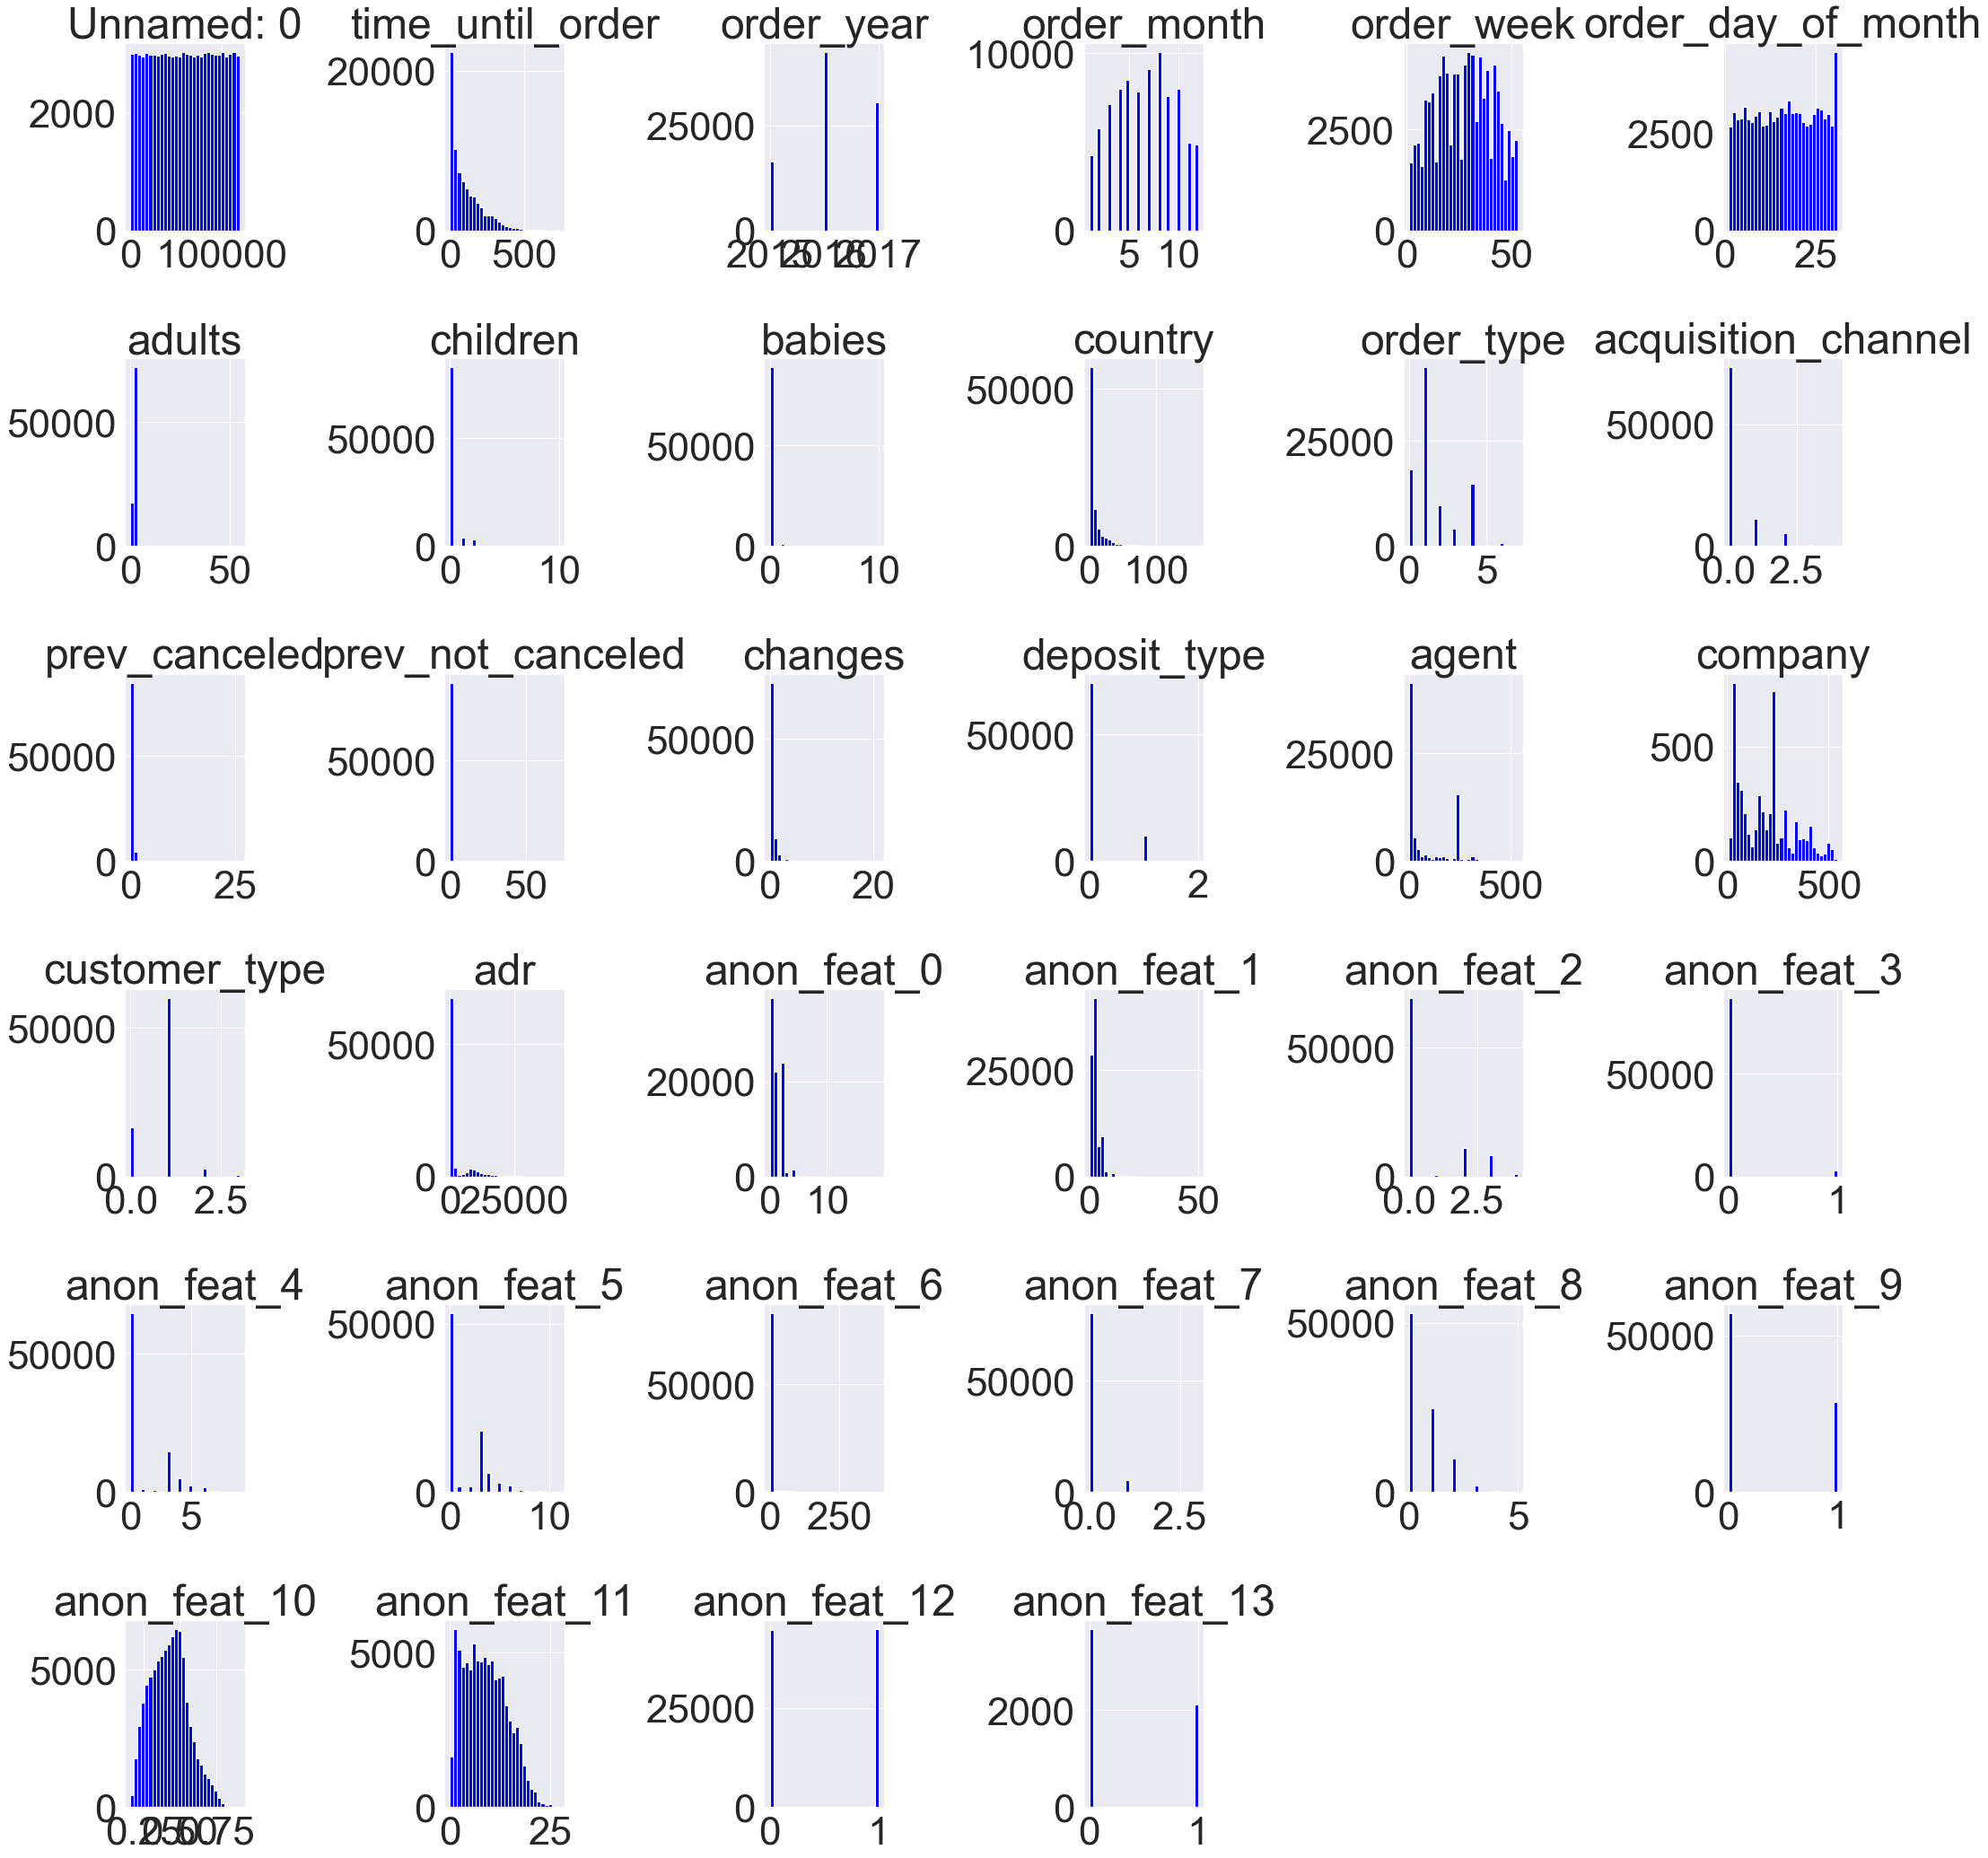

In [57]:
df.hist(figsize=(30,30), bins=30, color='blue')
plt.tight_layout()
plt.show()

## Correlation Matrix

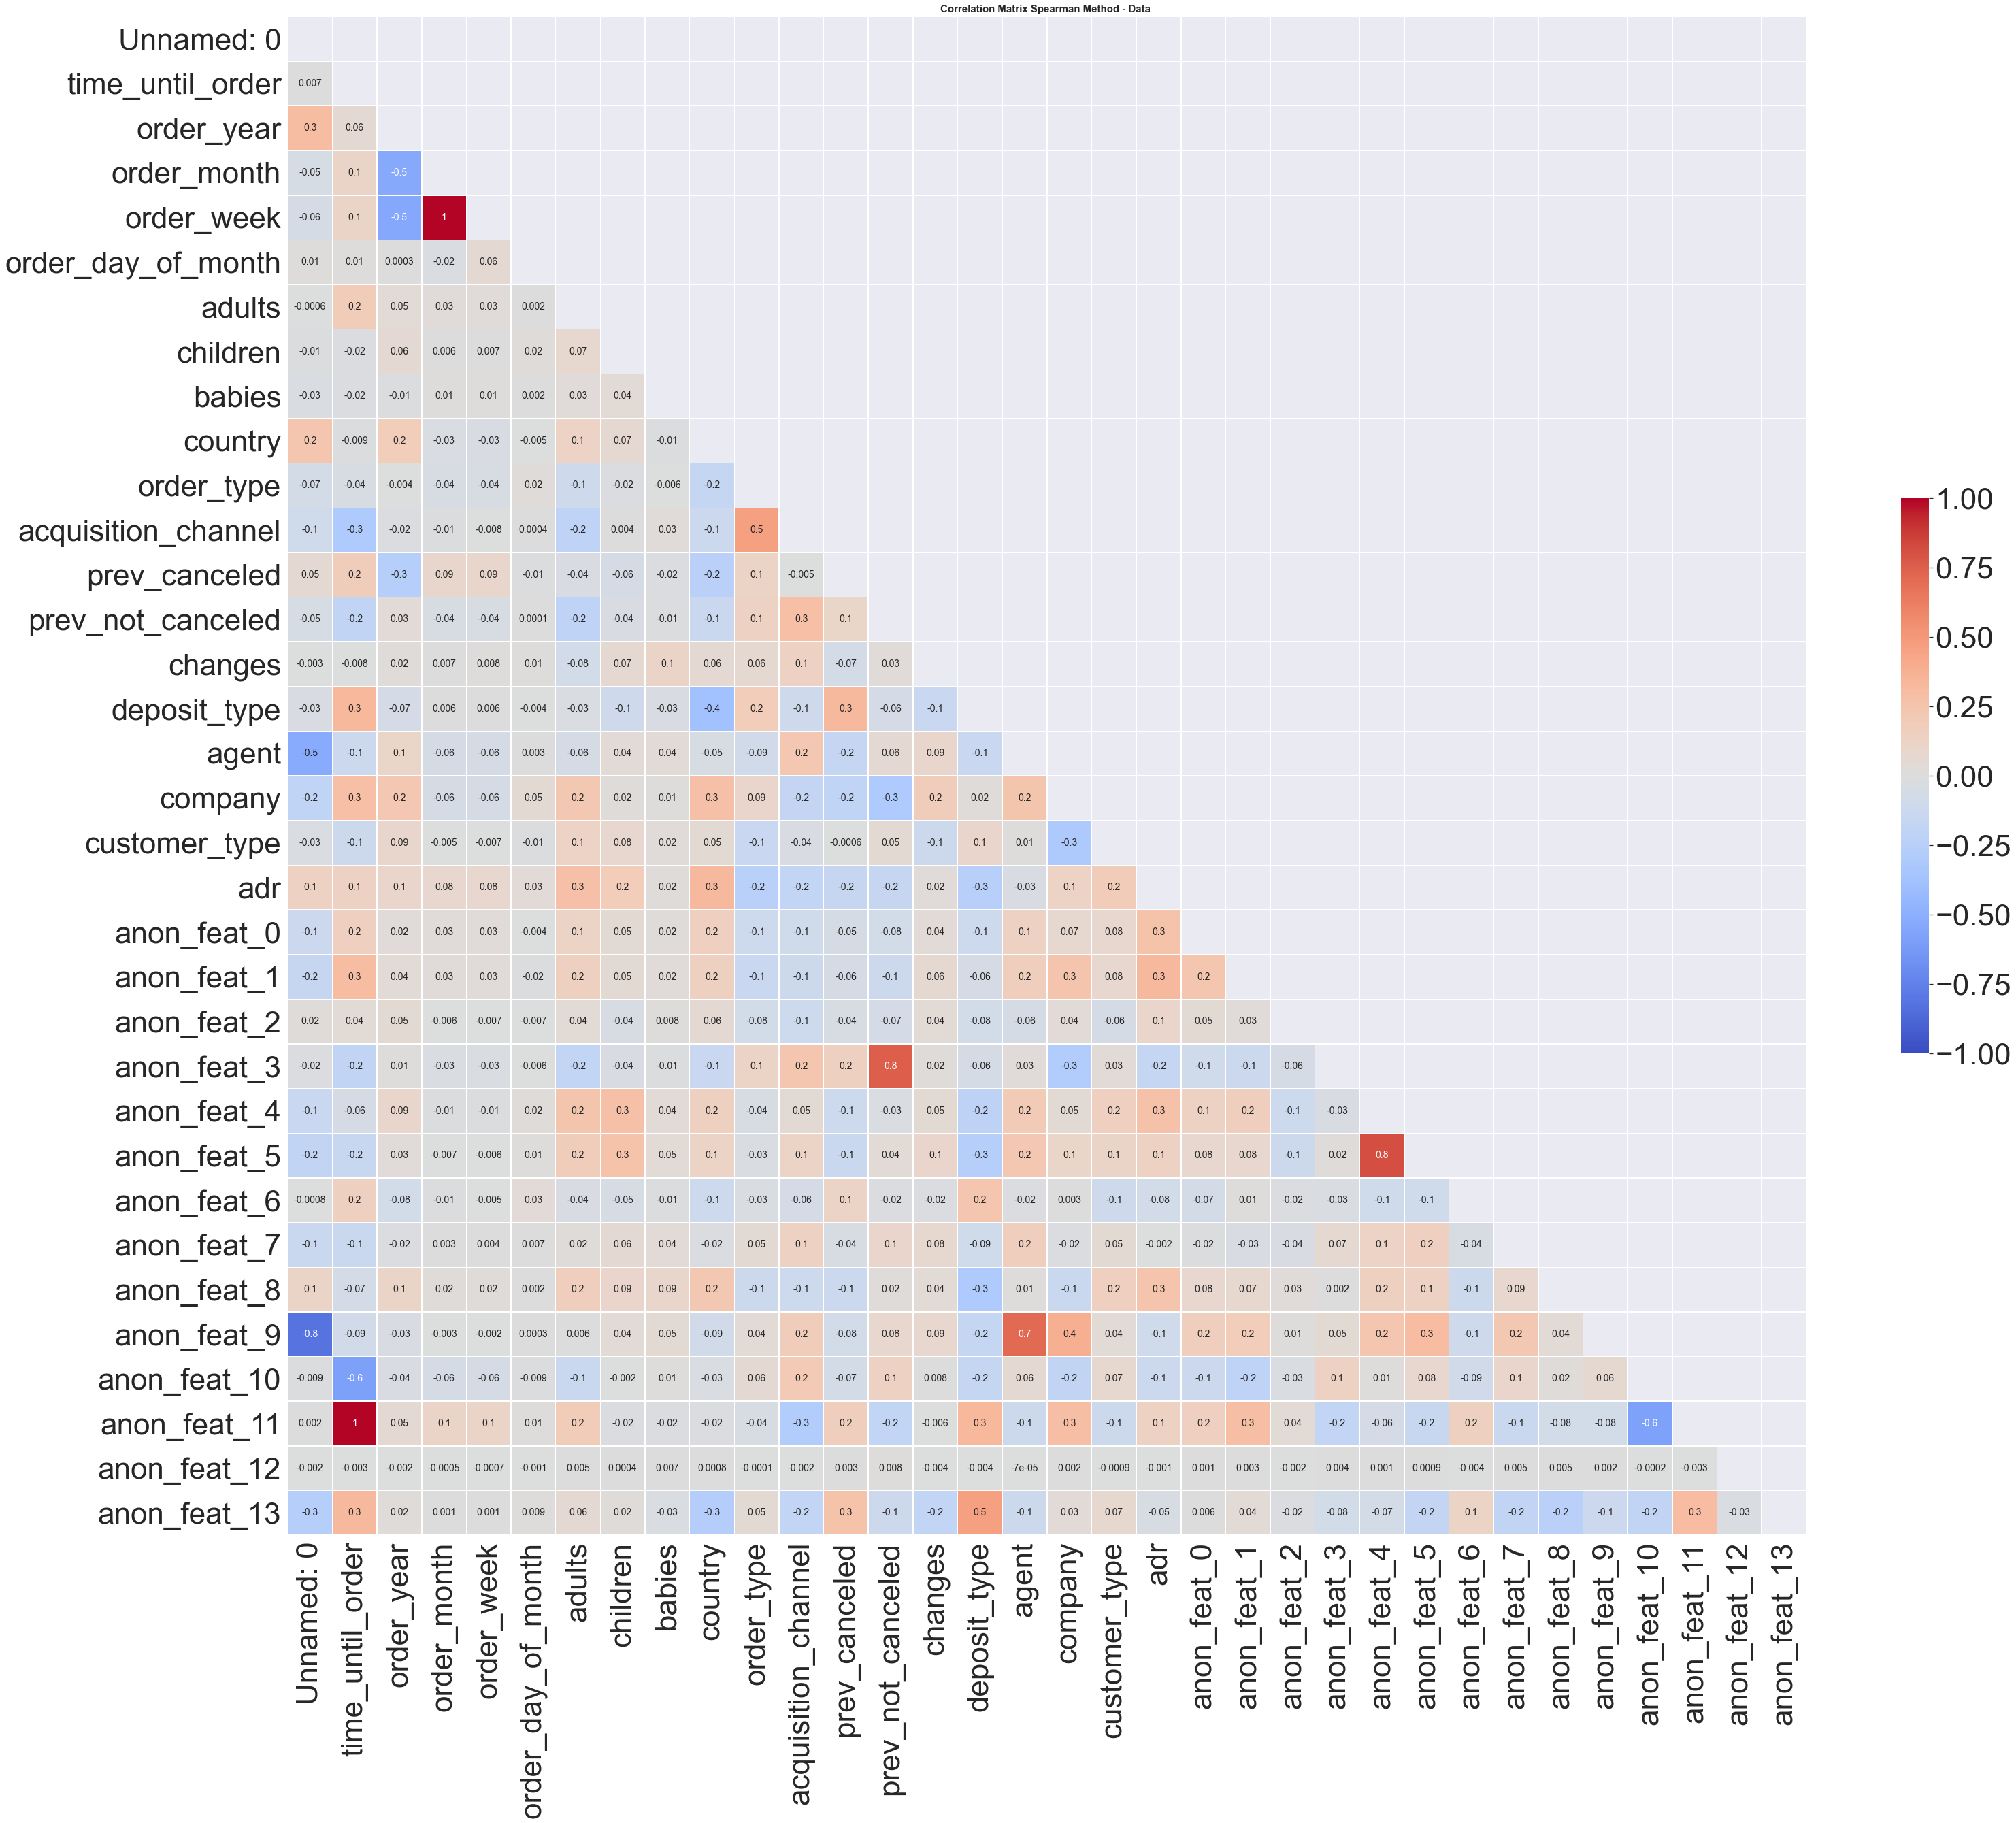

In [58]:
plt.figure(figsize=(50,50))
corr=df.corr(method='spearman')
mask_corr = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'coolwarm', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":14},)
plt.title("Correlation Matrix Spearman Method - Data ",size=15, weight='bold')
plt.show()

### From the Heatmap

In [59]:
corr = corr[corr>=0.55]
corr = corr.abs()
corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr

time_until_order   anon_feat_11    0.999476
order_month        order_week      0.995450
anon_feat_4        anon_feat_5     0.813804
prev_not_canceled  anon_feat_3     0.755504
agent              anon_feat_9     0.713712
dtype: float64

### Analyzing the Correlation Matrix
We have recognized a few suggested correlations:
<li>strong positive correlation between
<li>anon feature 11 - time until order
<li>agent - anon feat 9
<li>anon feature 5 - anon feature 4
of course we can discard order month and order week.

##Creating new features
We have decided that a few manipulations can be done on the features from the begining.
We think some features can be dicarded  completly, and some new ones should be created.
Features to drop:
<li>
<li>
<li>
Features to create:
<li> Season - by year's months.
<li>
<li>

In [60]:
# Creating seasons

df['season'] = df['order_month'].apply(month_num_season)

In [61]:
# Creating "oredered in advance" feature

df['ordered_in_advance'] = df['time_until_order'] > 250 #TODO That looks very smart to me

In [62]:
# Creating "has_kids" feature

df['has_kids'] = df['children'] > 0
df['has_kids'] = df['has_kids'].astype(int)

In [63]:
# The training Data

y= pd.read_csv('Example/label_data.csv')
y['cancelation'] = y["cancelation"].astype(int)
df.corrwith(y["cancelation"])

Unnamed: 0            -0.242871
time_until_order       0.294502
order_year             0.014949
order_month            0.012261
order_week             0.009628
order_day_of_month    -0.006737
adults                 0.058103
children               0.005691
babies                -0.032331
country               -0.123692
order_type             0.114295
acquisition_channel   -0.156349
prev_canceled          0.109633
prev_not_canceled     -0.060068
changes               -0.144559
deposit_type           0.466801
agent                 -0.081911
company               -0.012482
customer_type          0.084367
adr                   -0.070436
anon_feat_0           -0.000038
anon_feat_1            0.026997
anon_feat_2           -0.016972
anon_feat_3           -0.085612
anon_feat_4           -0.060772
anon_feat_5           -0.176803
anon_feat_6            0.058219
anon_feat_7           -0.197533
anon_feat_8           -0.233985
anon_feat_9           -0.136527
anon_feat_10          -0.204077
anon_fea

In [64]:
# Early Predictions and Ideas
## Exploring New Features

### Seasons vs number of orders

### Has kids vs order month

### Season vs cancellation

### Effects of Kids Number

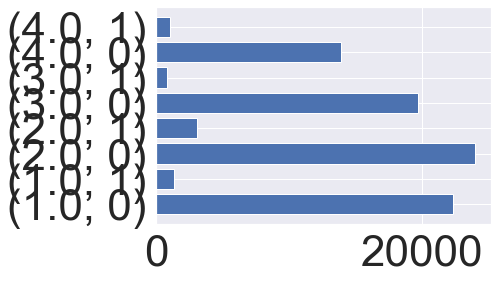

<Figure size 30000x30000 with 0 Axes>

In [65]:
df.groupby(['season', 'has_kids']).count()
mont = ["".join(str(i)) for i in list(df2.index)]
plt.barh(mont, df2['Unnamed: 0'])
plt.figure(figsize=(200, 200), dpi=150)
plt.show()

In [66]:
# Showcase kid number vs other features (which ???)

###  Prev Canceled Effect on Changes made

## Answers - Exploration
<br>
1. People who have deleted their orders more than 20 times.
  family with 10 kids that ordered a hotel
  -those cases are possible but they are outliers, therefore, we moved only the features that have more than 50% missing values
<br>
2. The data is not scaled.  scaling is essential for machine learning algorithms that calculate distances between data.
 If not scale, the feature with a higher value range starts dominating when calculating distances.
<br>
3. There are 253577 missing values in the dataframe. we chose to move only the features that with more than 50% missing values
have
<br>
4. The problem has more than 30  features for each row. big dimensionality can affect the predictions' accuracy.



### Splitting the Data
At this stage we would like to split the data before further manipulations are done.

In [67]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

Dropping Features
We chose features for standardization by dropping non-numeric or cyclic values

In [68]:
features_to_scale = ['time_until_order', 'adults', 'children', 'babies',
       'prev_canceled',
       'prev_not_canceled', 'changes',
      'adr', 'anon_feat_0', 'anon_feat_1', 'anon_feat_2',
       'anon_feat_3', 'anon_feat_4', 'anon_feat_5', 'anon_feat_6',
       'anon_feat_7', 'anon_feat_8', 'anon_feat_9', 'anon_feat_10',
       'anon_feat_11']
drop_col = df.isnull().sum().divide(89541)
drop_col = list(drop_col[drop_col>0.5].index)
drop_col
df = df.drop(columns=drop_col)
df = df.drop(columns=features_to_scale)

# Scaling the Data

In [69]:
# Using Standard Scaler
x = df.loc[:,features_to_scale].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

KeyError: "None of [Index(['time_until_order', 'adults', 'children', 'babies', 'prev_canceled',\n       'prev_not_canceled', 'changes', 'adr', 'anon_feat_0', 'anon_feat_1',\n       'anon_feat_2', 'anon_feat_3', 'anon_feat_4', 'anon_feat_5',\n       'anon_feat_6', 'anon_feat_7', 'anon_feat_8', 'anon_feat_9',\n       'anon_feat_10', 'anon_feat_11'],\n      dtype='object')] are in the [columns]"

# PCA Testing - Dimensionality

In [ ]:
#TODO GUY - PCA like in KABAKA
from sklearn.decomposition import PCA
x = x.dropna()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
df[list(principalDf.columns)] = principalDf

In [ ]:
#A block to test correlations of PCA values on different feature values and show them (different colors)
#
# fig = plt.figure(figsize = (10,10))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = list(df['order_type'].unique())
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'green']
# for target, color in zip(targets,colors):
#     indicesToKeep = df['order_type'] == target
#     ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
#                , principalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

# Modelling
## Classifiers

In [ ]:
clfs = [KNeighborsClassifier(), LogisticRegression(), MLPClassifier(), RamdomForest()]

In [ ]:
for clf in clfs:
    clf.fit(X_train, y_train)
    plot_roc_curve(clf, X_train, y_train)
    plt.show()
